In [26]:
import geopandas as gpd
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
#download Energy and Water Data Disclosure for Local Law 84 (2013)
APIendPoint = 'https://data.cityofnewyork.us/resource/m46j-75iy.csv' 
nrg = pd.read_csv(APIendPoint)
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,NaN,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [13]:
os.getenv("PUIDATA")

'/home/pipe/Dropbox/NYU/classes/principles/puiDATA'

In [25]:
#download pluto data
plutoVersion = 'mappluto_16v1.zip'
plutoURL = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/'  
os.system("wget " + plutoURL + plutoVersion)

#move an unzip the file in PUIDATA folder
os.system("mv " + plutoVersion + ' ' + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/" + plutoVersion + ' -d ' + os.getenv("PUIDATA"))



0

In [53]:
bsize = gpd.read_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")


In [37]:
print nrg.columns
nrg.rename(columns={'nyc_borough_block_and_lot_bbl': 'BBL'}, inplace=True)
print nrg.columns


Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')
Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'

In [85]:
#nrg.site_eui_kbtu_ft2.map(pd.to_numeric)
#pd.to_numeric(nrg.site_eui_kbtu_ft2[16])

caca = pd.to_numeric(nrg.site_eui_kbtu_ft2, errors = 'coerce')
#caca2 = nrg.site_eui_kbtu_ft2.map(pd.to_numeric)
#print type(nrg.site_eui_kbtu_ft2[16])
print caca
#print type(caca2)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16       125.4
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
16140      NaN
16141      NaN
16142      NaN
16143      NaN
16144      NaN
16145      NaN
16146      NaN
16147      NaN
16148      NaN
16149      NaN
16150      NaN
16151      NaN
16152      NaN
16153      NaN
16154      NaN
16155      NaN
16156      NaN
16157      NaN
16158      NaN
16159      NaN
16160      NaN
16161      NaN
16162      NaN
16163      NaN
16164      NaN
16165      NaN
16166      NaN
16167      NaN
16168      NaN
16169      NaN
Name: site_eui_kbtu_ft2, dtype: float64


In [89]:
#Keep
#Energy 
## BBL
## site_eui_kbtu_ft2  a measure of the energy consumed PER SQ FOOT by a building
## reported_property_floor_area_building_s_ft
## source_eui_kbtu_ft2


nrg['siteEUI'] = pd.to_numeric(nrg.site_eui_kbtu_ft2, errors = 'coerce')
nrg['sourceEUI'] = pd.to_numeric(nrg.source_eui_kbtu_ft2, errors = 'coerce')
nrg['floorArea']= pd.to_numeric(nrg.reported_property_floor_area_building_s_ft, errors = 'coerce')
nrg = nrg.copy().loc[:,['BBL','siteEUI','sourceEUI','floorArea']]



AttributeError: 'DataFrame' object has no attribute 'site_eui_kbtu_ft2'

In [94]:
nrg.head()

,BBL,siteEUI,sourceEUI,floorArea
0,NaN,NaN,NaN,918919.0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,64200.0
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,50000.0


In [98]:
type(nrg.floorArea[0])

numpy.float64

ValueError: zero-size array to reduction operation minimum which has no identity

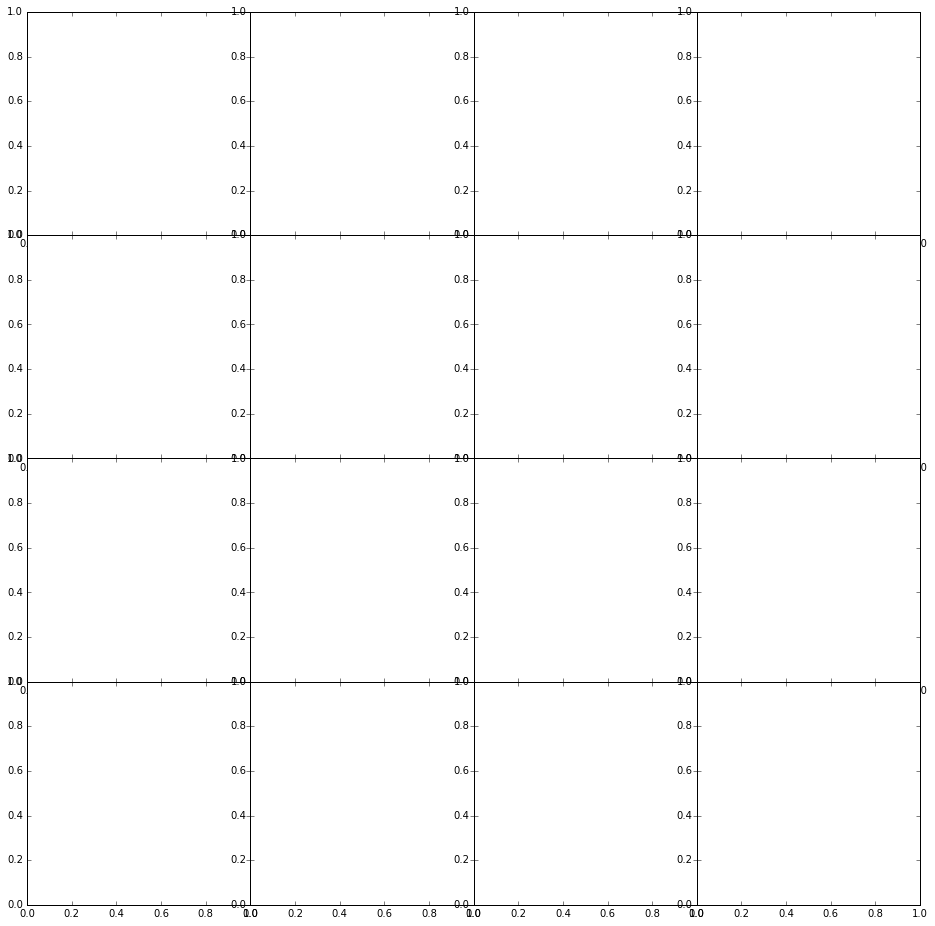

In [100]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(nrg, figsize=(16, 16))

In [55]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [51]:
bblnrgdata = pd.merge()


numpy.float64